In [1]:
# Load in the vector representations of the images and plot the closest images
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
# Load the vector representations
df = pd.read_csv('/Users/rz20505/Documents/training_year/applied_data_science/models/yolov5-master/data/vectors.csv')
# The df['feature_vector'] column is a string representation of a list of numbers
# We need to convert this to a list of numbers
df['feature_vector'] = df['feature_vector'].apply(lambda x: [float(i) for i in x[1:-1].strip('][').split(', ')])


In [7]:
df['feature_vector'] = df['feature_vector'].apply(lambda x: np.array(x))

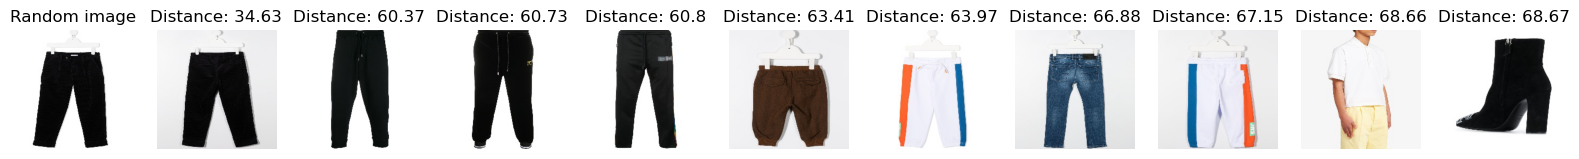

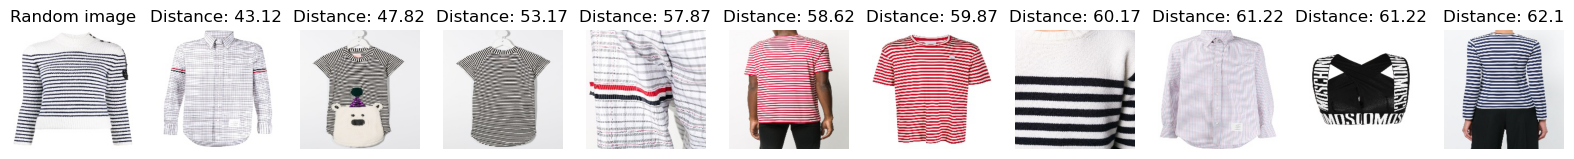

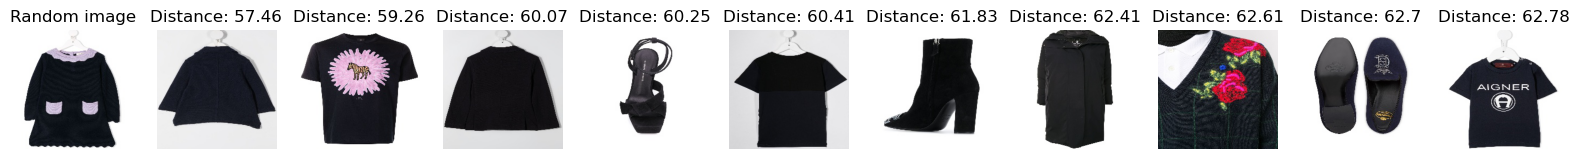

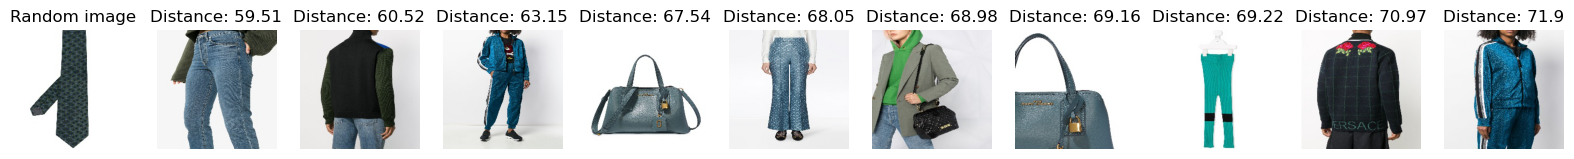

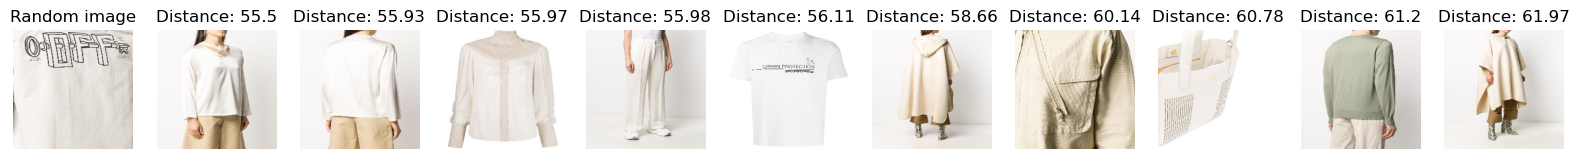

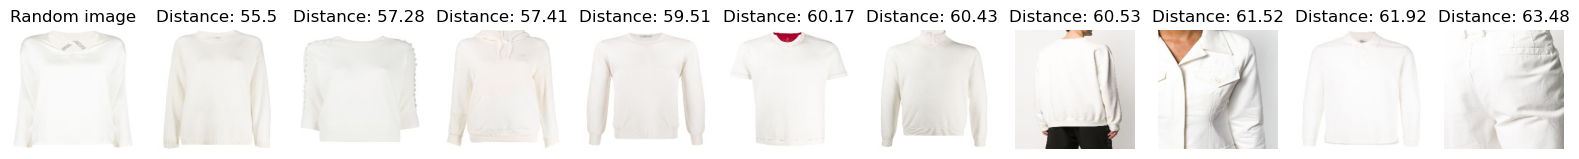

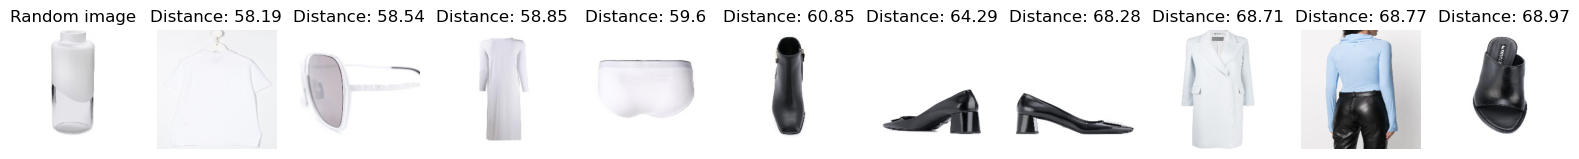

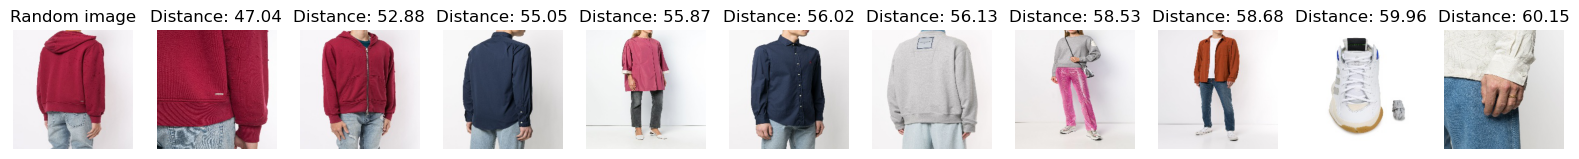

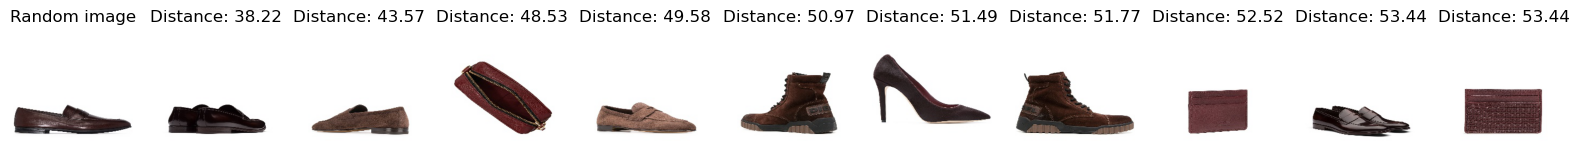

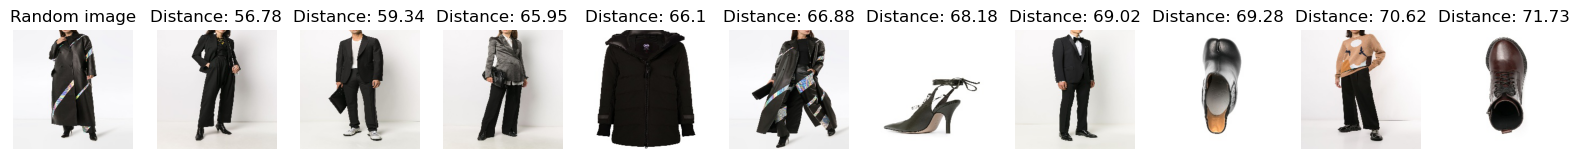

In [10]:
# Get 10 random images and show the images with the closest vector representations in euclidian distance
for i in range(10):
    # Get a random image
    random_image = df.sample(1)
    # Get the vector representation of the image
    random_image_vector = random_image['feature_vector'].values[0]
    # Get the image path
    random_image_path = random_image['image'].values[0]
    # Calculate the euclidian distance between the random image and all other images
    df['euclidian_distance'] = df['feature_vector'].apply(lambda x: np.linalg.norm(random_image_vector - x))
    # Sort the dataframe by the euclidian distance
    df = df.sort_values(by=['euclidian_distance'])
    # Get the top 10 closest images
    top_10 = df.head(11)
    # Remove the random image from the top 10
    top_10 = top_10[top_10['image'] != random_image_path]
    # Plot the random image
    plt.figure(figsize=(20,20))
    plt.subplot(1, 11, 1)
    plt.imshow(mpimg.imread(random_image_path))
    plt.title('Random image')
    plt.axis('off')
    # Plot the top 10 closest images
    for i in range(10):
        plt.subplot(1, 11, i+2)
        plt.imshow(mpimg.imread(top_10.iloc[i]['image']))
        plt.title('Distance: ' + str(round(top_10.iloc[i]['euclidian_distance'], 2)))
        plt.axis('off')
    plt.show()

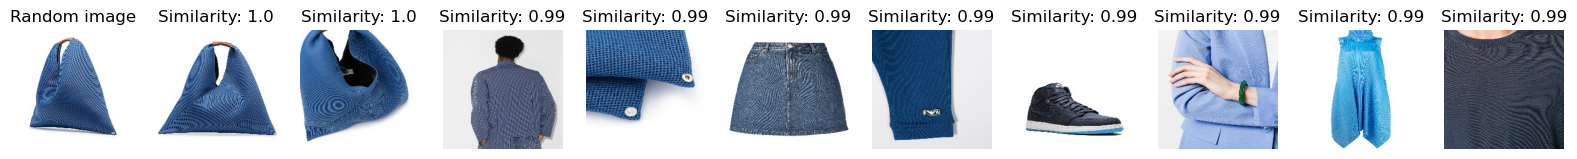

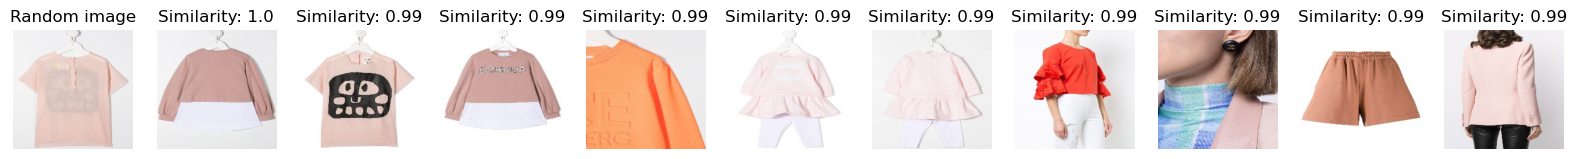

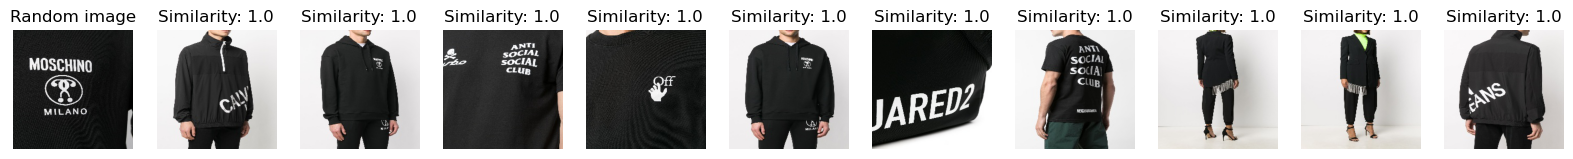

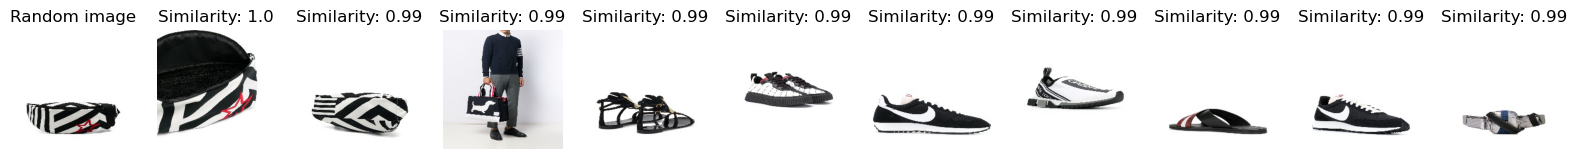

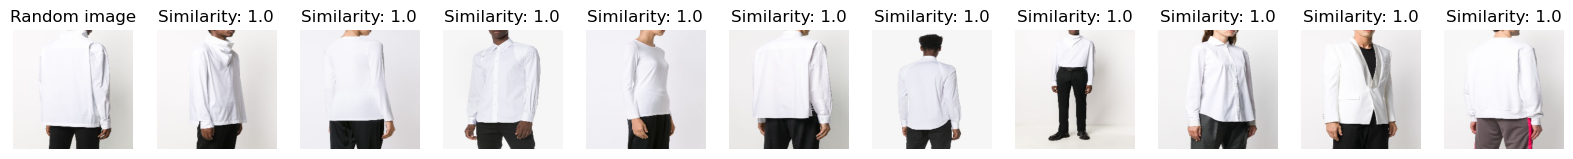

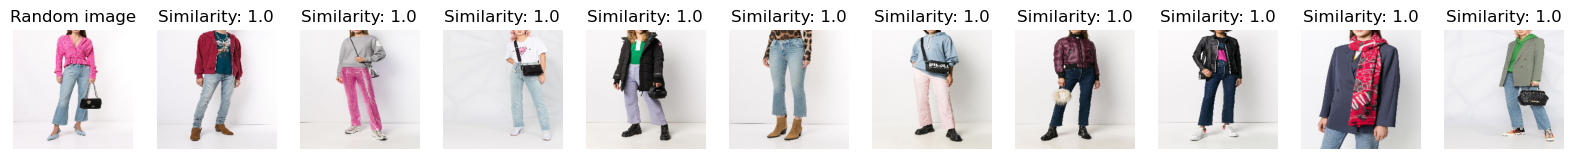

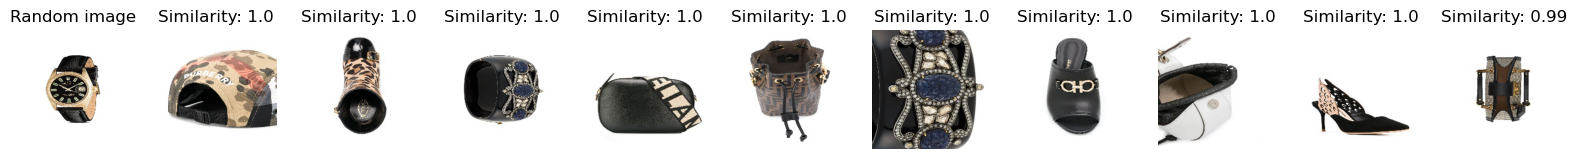

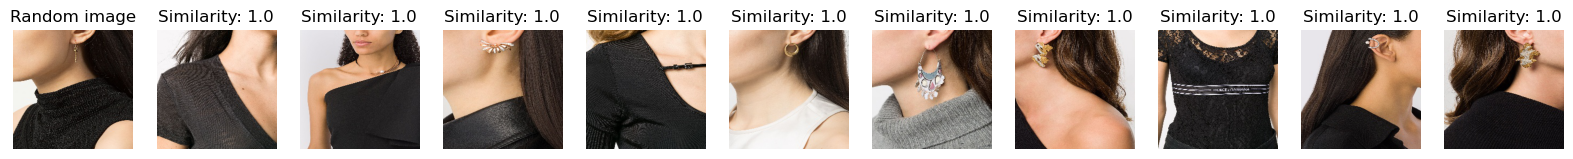

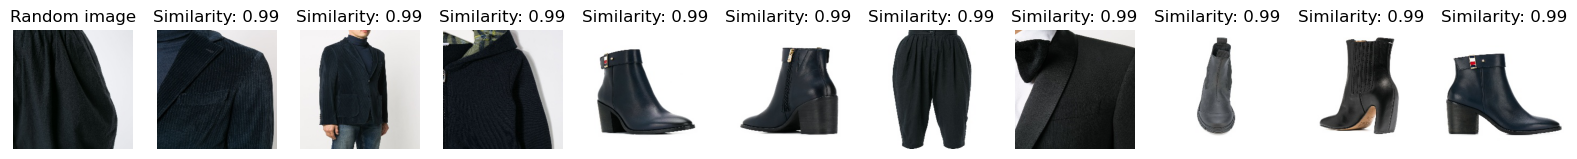

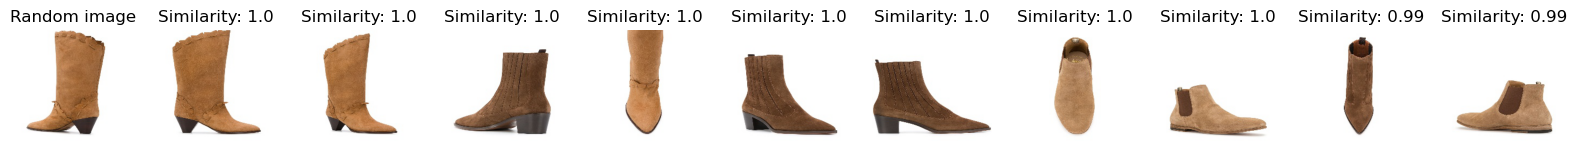

In [11]:
# Get 10 random images and show the images with the closest vector representations in cosine similarity
for i in range(10):
    # Get a random image
    random_image = df.sample(1)
    # Get the vector representation of the image
    random_image_vector = random_image['feature_vector'].values[0]
    # Get the image path
    random_image_path = random_image['image'].values[0]
    # Calculate the cosine similarity between the random image and all other images
    df['cosine_similarity'] = df['feature_vector'].apply(lambda x: np.dot(random_image_vector, x) / (np.linalg.norm(random_image_vector) * np.linalg.norm(x)))
    # Sort the dataframe by the cosine similarity
    df = df.sort_values(by=['cosine_similarity'], ascending=False)
    # Get the top 10 closest images
    top_10 = df.head(11)
    # Remove the random image from the top 10
    top_10 = top_10[top_10['image'] != random_image_path]
    # Plot the random image
    plt.figure(figsize=(20,20))
    plt.subplot(1, 11, 1)
    plt.imshow(mpimg.imread(random_image_path))
    plt.title('Random image')
    plt.axis('off')
    # Plot the top 10 closest images
    for i in range(10):
        plt.subplot(1, 11, i+2)
        plt.imshow(mpimg.imread(top_10.iloc[i]['image']))
        plt.title('Similarity: ' + str(round(top_10.iloc[i]['cosine_similarity'], 2)))
        plt.axis('off')
    plt.show()